Step 1: Import Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




Step 2: Load and Prepare Letter Recognition Dataset

In [ ]:
# Load the Letter Recognition dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

# Define column names
columns = ['Letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
           'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

# Read the dataset
letter_data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
letter_data.head()



,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
# Extract features (X) and labels (y)
X = letter_data.iloc[:, 1:].values  # All columns except 'Letter'
y = letter_data['Letter'].values    # The 'Letter' column as labels

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Define the K-NN Classifier Function

In [ ]:
# Function to train and evaluate K-NN with different distance metrics and K values
def evaluate_knn(X_train, X_test, y_train, y_test, distance_metrics, k_range):
    results = []

    for metric in distance_metrics:
        for k in k_range:
            # Initialize K-NN classifier
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

            # Train the model
            knn.fit(X_train, y_train)

            # Predict on the test set
            y_pred = knn.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Generate confusion matrix
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Append results
            results.append({'Metric': metric, 'K': k, 'Accuracy': accuracy, 'Confusion_Matrix': conf_matrix})
            print(f"Metric: {metric}, K: {k}, Accuracy: {accuracy}")

    # Create a DataFrame from results
    results_df = pd.DataFrame(results)

    # Save the results to an Excel file
    results_df.to_excel('/content/knn_results.xlsx', index=False)

    return results_df


In [ ]:
# Define distance metrics and K values
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 11)



In [ ]:
# Evaluate the model and save the results
letter_results_df = evaluate_knn(X_train, X_test, y_train, y_test, distance_metrics, k_values)

# Display the saved results DataFrame
letter_results_df.head()


Metric: euclidean, K: 1, Accuracy: 0.95325
Metric: euclidean, K: 2, Accuracy: 0.9445
Metric: euclidean, K: 3, Accuracy: 0.95125
Metric: euclidean, K: 4, Accuracy: 0.9495
Metric: euclidean, K: 5, Accuracy: 0.952
Metric: euclidean, K: 6, Accuracy: 0.948
Metric: euclidean, K: 7, Accuracy: 0.9515
Metric: euclidean, K: 8, Accuracy: 0.9465
Metric: euclidean, K: 9, Accuracy: 0.94525
Metric: euclidean, K: 10, Accuracy: 0.944
Metric: manhattan, K: 1, Accuracy: 0.9505
Metric: manhattan, K: 2, Accuracy: 0.93775
Metric: manhattan, K: 3, Accuracy: 0.95075
Metric: manhattan, K: 4, Accuracy: 0.947
Metric: manhattan, K: 5, Accuracy: 0.9495
Metric: manhattan, K: 6, Accuracy: 0.9495
Metric: manhattan, K: 7, Accuracy: 0.951
Metric: manhattan, K: 8, Accuracy: 0.95
Metric: manhattan, K: 9, Accuracy: 0.947
Metric: manhattan, K: 10, Accuracy: 0.947
Metric: chebyshev, K: 1, Accuracy: 0.8765
Metric: chebyshev, K: 2, Accuracy: 0.85525
Metric: chebyshev, K: 3, Accuracy: 0.87975
Metric: chebyshev, K: 4, Accuracy:

,Metric,K,Accuracy,Confusion_Matrix
0,euclidean,1,0.95325,"[[149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,euclidean,2,0.94450,"[[149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,euclidean,3,0.95125,"[[149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,euclidean,4,0.94950,"[[149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,euclidean,5,0.95200,"[[149, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
from google.colab import files

# Download the results file
files.download('/content/knn_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Metric: euclidean, K: 1, Accuracy: 0.95325
Metric: euclidean, K: 2, Accuracy: 0.9445
Metric: euclidean, K: 3, Accuracy: 0.95125
Metric: euclidean, K: 4, Accuracy: 0.9495
Metric: euclidean, K: 5, Accuracy: 0.952
Metric: euclidean, K: 6, Accuracy: 0.948
Metric: euclidean, K: 7, Accuracy: 0.9515
Metric: euclidean, K: 8, Accuracy: 0.9465
Metric: euclidean, K: 9, Accuracy: 0.94525
Metric: euclidean, K: 10, Accuracy: 0.944
Metric: manhattan, K: 1, Accuracy: 0.9505
Metric: manhattan, K: 2, Accuracy: 0.93775
Metric: manhattan, K: 3, Accuracy: 0.95075
Metric: manhattan, K: 4, Accuracy: 0.947
Metric: manhattan, K: 5, Accuracy: 0.9495
Metric: manhattan, K: 6, Accuracy: 0.9495
Metric: manhattan, K: 7, Accuracy: 0.951
Metric: manhattan, K: 8, Accuracy: 0.95
Metric: manhattan, K: 9, Accuracy: 0.947
Metric: manhattan, K: 10, Accuracy: 0.947
Metric: chebyshev, K: 1, Accuracy: 0.8765
Metric: chebyshev, K: 2, Accuracy: 0.85525
Metric: chebyshev, K: 3, Accuracy: 0.87975
Metric: chebyshev, K: 4, Accuracy:

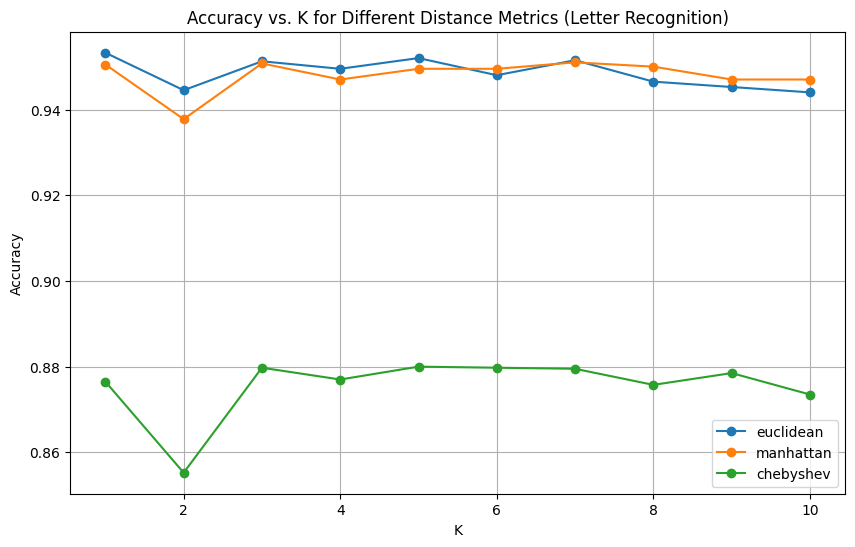

In [ ]:
import matplotlib.pyplot as plt

# Ensure that the results DataFrame is obtained from the evaluate_knn function
# If you already have 'letter_results_df' as the result of 'evaluate_knn', you can skip this step
letter_results_df = evaluate_knn(X_train, X_test, y_train, y_test, distance_metrics, k_values)

# Plot accuracy for each metric
plt.figure(figsize=(10, 6))

for metric in distance_metrics:
    subset = letter_results_df[letter_results_df['Metric'] == metric]
    plt.plot(subset['K'], subset['Accuracy'], marker='o', label=metric)

plt.title('Accuracy vs. K for Different Distance Metrics (Letter Recognition)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


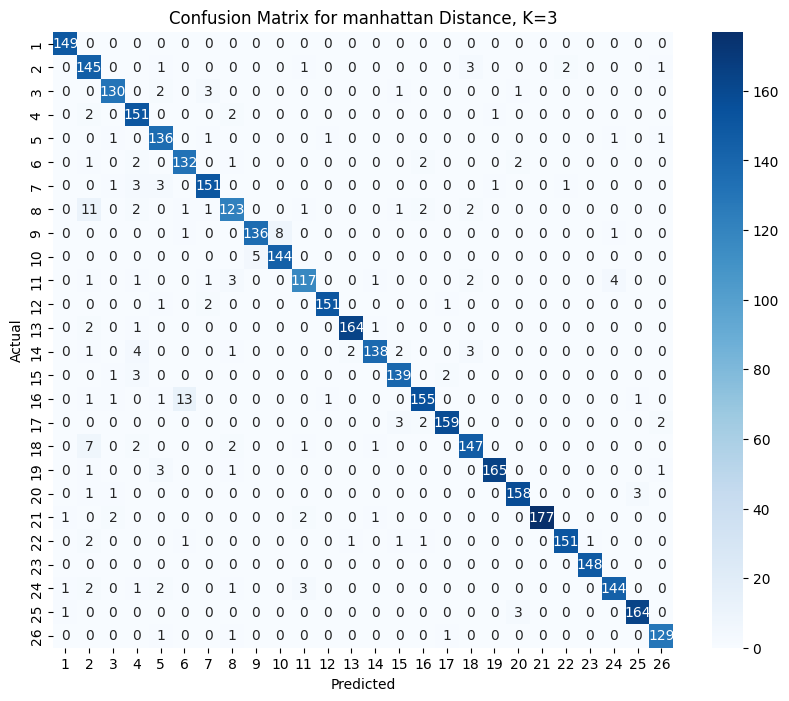

In [ ]:
# Display confusion matrices for a specific configuration
specific_metric = 'manhattan'
specific_k = 3

# Filter results to find the corresponding confusion matrix
conf_matrix_result = [result for result in letter_results_df.to_dict(orient='records')
                      if result['Metric'] == specific_metric and result['K'] == specific_k]

# Ensure there's a result for this configuration
if conf_matrix_result:
    conf_matrix = conf_matrix_result[0]['Confusion_Matrix']

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 27), yticklabels=range(1, 27))
    plt.title(f'Confusion Matrix for {specific_metric} Distance, K={specific_k}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
else:
    print(f"No results found for {specific_metric} distance with K={specific_k}.")

